# HW 2

In [18]:
## Importing Libraries 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#### 1) Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?


With two six sided dice, there are a total of 36 different rolling possibilities.

*The probability of rolling snake eyes:*
There is only one way  to roll snake eyes.
P $ = \frac{1}{6}*\frac{1}{6} = \frac{1}{36}$

*The probability of rolling dice that sum to seven:*
There are six different ways to roll a seven with two dice.

P $ = \frac{6}{36} = \frac{1}{6}$

The **ratio of the probabilities** of rolling sevens to rolling snake eyes $ = \frac{\frac{6}{36}}{\frac{1}{36}} = 6$

**The probability of rolling a seven is 6 times more than the than rolling snake eyes.**

####  2) Show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).


**Analytical:**
Rolling two six sided dice, there are a total of 6*6=36 different rolling possiblities.

To determine the probability of the sum of 2 six sided dice, you need to find the number of ways you can roll two dice that sum to the same number.

**Discrete Convolution:**

$${\displaystyle (f*g)[n]=\sum _{m=-\infty }^{\infty }f[m]g[n-m],}$$

m = dummy variable, that sets both arrays to lenght m, flip second array

second array (-m) flips order

Probabilities of rolling two dice that sum to given #:
(calculated by counting)
-  2: 1/36
-  3: 2/36
-  4: 3/36
-  5: 4/36
-  6: 5/36
-  7: 6/36
-  8: 5/36
-  9: 4/36
- 10: 3/36
- 11: 2/36
- 12: 1/36

**Code:**

Here we make an array representing the different numbers on each face of the die.

Next we make an array that represents the probability of rolling each number on the six sided die. This is a 1/6 probability for each number.

To find the probability of rolling a sum of each number, we use the convolution operator with both dice. 

In [19]:
#array representing the die --? Do i need this
die = [1, 2, 3, 4, 5, 6];

#Probability of rolling each number on a die
dice_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]; 

#Use the convolution function to find the probabilities for rolling a sum of 
#a number with two dice
probability_of_sum_to_number = np.convolve(dice_prob, dice_prob, mode = 'full')
#USE VALID TO PROVE?? --> not nessary?

print("The array of probabilities to sum for each number: ")
print(probability_of_sum_to_number)

The array of probabilities to sum for each number: 
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


#### Plot 

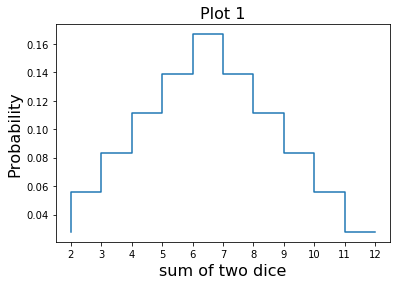

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [20]:
#Average and stardard deviation is the sum of the individual events

#Plot probability 
number_sum = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];

#Graph with histogram and histogram together
plt.step(number_sum,probability_of_sum_to_number)
#plt.hist(number_sum, probability_of_sum_to_number)
plt.title("Plot 1", size = 16)
plt.ylabel("Probability", size = 16)
plt.xlabel("sum of two dice", size = 16)
plt.xticks(number_sum)
plt.show()
print(number_sum)

####  3) Calculate the mean and the variance of the distribution in problem 2


In [21]:
#Calculate mean
reversed_number_sum = number_sum[::-1]
#print(number_sum)
#print(reversed_number_sum)

#Find mean
probability_mean = np.convolve(probability_of_sum_to_number, number_sum, mode = 'valid')
print('the mean is: ', probability_mean)

#Find vairance
variance = sum(((number_sum - probability_mean)**2)*probability_of_sum_to_number)
print('the variance is: ', variance)

the mean is:  [7.]
the variance is:  5.833333333333334


#### 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.



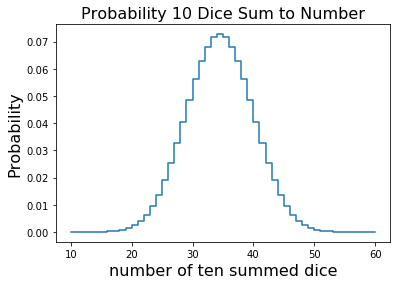

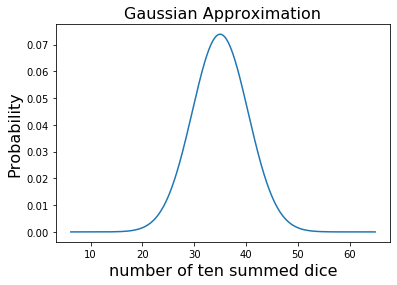

In [31]:
#Probability of rolling each number on a die

dice_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6];

dice2_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6];

#Convolving 10 times
for i in range(9):
    
    if i == 0:
        dice_roll_10_probs = np.convolve(dice_prob, dice2_prob);
        
    else: 
        dice_roll_10_probs = np.convolve(dice_prob, dice_roll_10_probs);
        

#----PLOT1: PROBABILITY VS. SUM OF 10 DICE ---
dice_10_sum = np.arange(10,61,1)
# The average can range from 1 to 6 ????????????????
plt.step(dice_10_sum, dice_roll_10_probs)
plt.title("Probability 10 Dice Sum to Number", size = 16)
plt.ylabel("Probability", size = 16)
plt.xlabel("number of ten summed dice", size = 16)
plt.show()
#print(dice_10_sum)






#----PLOT2: Probability vs. SUM of 10  dice in gaussian approximation---
#Find mean
reverse_dice_10_sum = dice_10_sum[::-1]
#print(reverse_dice_10_sum)

probab10_mean = np.convolve(dice_roll_10_probs, reverse_dice_10_sum, mode = 'valid')

#print(probab10_mean)

var10 = 10*np.var([1,2,3,4,5,6]);
sigma10 = np.sqrt(var10);

x = np.sort(stats.norm.rvs(probab10_mean,sigma10,1000000));
fig, ax = plt.subplots(1, 1)

ax.plot(x, stats.norm.pdf(x,probab10_mean,sigma10), label='normal pdf')

plt.title("Gaussian Approximation", size = 16)
plt.ylabel("Probability", size = 16)
plt.xlabel("number of ten summed dice", size = 16)
plt.show()

Our probability funciton follows a gaussian curve, as we can see with the similarities between the two graphs above. The mean is the same for both graphs, and the gaussian curve fits the step function graph.  The approximation improves as you increase the number of dice you are rolling, because there are more and more possible summed number possibilites, smoothing out the intervals in the step funciton. This is related to the central limit thorem, which states that when independent random variables are added their properly normalized sum tends towards a normal distribution. This is why the graph of rolling ten dice looks more gaussian than the graph in question 2 of rolling 2 dice. 

####  5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

As we saw from the example in class, the sum and average of an initially Gaussian distribution is also a gaussian. You can allso see this in my plots above. 

Additionally, no matter how many times you average a gaussian distribution, it will have a probability density function in the form: 

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

As you average a gaussian distribution, the standard deviation shrinks. This is because the average of two gaussian distributions will have a standard deviation that is the square root of of the addition two variances coresponding to each gaussian distribution. The square root makes the standard deviation smaller than just the addition of the variances. This means that overall, the new standard deviation is smaller.

This is important because as you integrate a signal over time and average a distribution, the standard deviation will evolve with time.